In [1]:
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("..")

In [2]:
# read from json
data = None
data_path = "../../../output/prioplus-eurosys25/experiments/"
experiment_name = "fig10b"
with open(data_path + experiment_name + ".json", "r") as f:
    data = json.load(f)

In [3]:
# In this experiment, we have four flows and a bottleneck link
# Draw the send rate of each flow in subfigure1
# And draw the queue length of the bottleneck link in subfigure2

# Calculate the send rate from data{flowStatistics:[0:4]:sentPkt:[timeNs,sizeByte]}
# The send rate is calculated by the number Bytes sent in each time interval
send_rate_interval_ns = 10e4  # 10us
send_rate = []
flow_num = 20
for i in range(flow_num):
    send_rate.append([])
    wnd_start = data["flowStatistics"][i]["sentPkt"][0]["timeNs"]
    # the first point
    send_rate[i].append({"timeNs": wnd_start, "sendRateGbps": 0})
    wnd_data = 0
    for sentPkt in data["flowStatistics"][i]["sentPkt"]:
        if sentPkt["timeNs"] - wnd_start > send_rate_interval_ns:
            # Gbps = bpns
            send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                                "sendRateGbps": wnd_data * 8 / send_rate_interval_ns})
            wnd_start = sentPkt["timeNs"]
            wnd_data = 0
        wnd_data += sentPkt["sizeByte"]
    # the last point
    send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                         "sendRateGbps": 0})



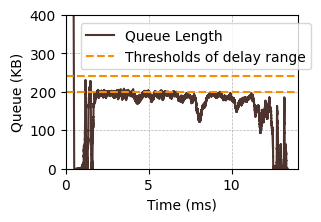

In [4]:
# draw the queue length of the bottleneck link
# draw the send rate in a new figure
fig = plt.figure(figsize=(3, 2))
ax1 = fig.add_subplot(111)
# ax.set_xlabel("Time (us)")

legend_lines = []

color_rate = ["#F44336", "#1E88E5"]
idx = {
    0: 1,
    1: 0
}
color_queue = ["#4E342E", "#FB8C00"]
line_style = ["-","--"]

time_shift = 100

ax1.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')
ax1.set_xlim(0, 14)
ax1.set_ylim(0, 400)
# hide x-axis label and ticks
# ax1.xaxis.set_tick_params(labelbottom=False)

ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Queue (KB)")
# time_shift = 100e3 + 10
switch_idx = 0
port_idx = 0
queue_idx = 0
line = ax1.plot([q["timeNs"]/1e6 - time_shift for q in data["switchStatistics"][switch_idx]["portStats"][port_idx]["queueStats"][queue_idx]["qLength"]],
                [q["lengthBytes"] / 1024 for q in data["switchStatistics"][switch_idx]["portStats"][port_idx]["queueStats"][queue_idx]["qLength"]], label="Queue Length", color=color_queue[0], linestyle=line_style[0])
legend_lines.append(line[0])
line = ax1.plot([100, 101],
                [100, 101], label = "Thresholds of delay range", color=color_queue[1], linestyle=line_style[1])
legend_lines.append(line[0])

ax1.hlines(200, 0, 14, colors=color_queue[1], linestyles='--')
ax1.hlines(240, 0, 14, colors=color_queue[1], linestyles='--')

ax1.legend(bbox_to_anchor=(0.034, 0.6))

plt.savefig("../figures/" + "fig10b" +
            ".pdf", bbox_inches='tight', dpi=600, format='pdf')